# <center>"A Project on E-Commerce Fraudulent Activity Detection"</center>


###  <center> Author-Shruti Gupta</center>
###  <center> Graduate Student MS-Computer Science@ IITC</center>
### <center> Date: 08/12/2019</center>

## Objective:
- The goal of this application is to find out any Fraudulent activities happening for the first time users and transactions details.
- Find out users country based on their Ip- Addresses ranges given
- Find out the factors contributing highest to the fraudulent activities
- Build different machine learning models and evaluate their performances and perform a legitimate analysis of the whole system and choose the best models which has a better catch of the fraudulent activities. 


## Problem Solving Approach and Discussion:

The data I have been given is a labelled data which identifies the difference between fradulent and non-fraudulent transactions. There can be number of Supervised and even Un-supervised approaches that can be taken into consideration. As the objective is to find out every possible outlier or the case which does not look normal user activity, which makes it a CLASSIFICATION PROBLEM. For these kind of problem solving, I am choosing the following models in my project as below: 

- Random Forest
- Random Forest(with SMOTE)
- K-Nearest Neighbours
- Logistic Regression
- Isolation Forest

We will find out below which classification Model works best as per the requirement of the problem. 

### Metrics and Evaluation:

1. Accuracy
2. Confusion Matrix
3. Precision
4. Recall
5. F1-Score
6. AUC(Area under curve ROC)

As just Accuracy would not be the only metric we care about we want to find the right trade-off between the Precision and recall as Recall indicates the ability of model to find out the Fraudulent cases while Precision will indicate how many innocent users has been identified as the victims of being claimed as fraudulent users. Hence we chose F1-Score as a better metric to evaluate the model which handles this imbalance in the precision and recall(being the harmonic mean between the two). Also AUC is something we care for. 

## STEP-1: Importing the Libraries: 

In [64]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from pandas.api.types import is_string_dtype
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (f1_score,
                             roc_auc_score,
                             roc_curve,
                             accuracy_score,
                             classification_report,
                             confusion_matrix)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# STEP2: Data Loading

In [65]:
# Loading the data from both the CSV
fraud_data_raw = pd.read_csv('Candidate_tech_evaluation_candidate_copy_data science_fraud.csv')
fraud_data = fraud_data_raw.drop('Unnamed: 0', axis=1)
country_ip_range = pd.read_excel('Candidate_tech_evaluation_candidate_copy_datascience_IpAddress_to_Country.xlsx')

# STEP3: Data Exploration and Preprocessing

### Feature Engineering: 1.Adding Country column as per the IP-Address of the user-id and mapping it. 

-This is useful representation and hence included in a part of feature engineering.

In [66]:
# Find and map user country from ip address
# NOTE: this method takes around 7-8 min of time 

import datetime
print(datetime.datetime.now())
country = []
for i in fraud_data['ip_address']:
   a = int(i) >= country_ip_range['lower_bound_ip_address']
   b = int(i) <= country_ip_range['upper_bound_ip_address']
   res = country_ip_range[a & b]
   try:
       country.append((res['country'].values[0]))
   except:
       country.append('')

fraud_data['country'] = pd.DataFrame(country)
print(datetime.datetime.now())

fraud_data

2019-08-12 16:24:39.471103
2019-08-12 16:28:29.005217


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,285108,7/15/2015 4:36,9/10/2015 14:17,31,HZAKVUFTDOSFD,Direct,Chrome,M,49,2.818400e+09,0,United States
1,131009,1/24/2015 12:29,4/13/2015 4:53,31,XGQAJSOUJIZCC,SEO,IE,F,21,3.251268e+09,0,United Kingdom
2,328855,3/11/2015 0:54,4/5/2015 12:23,16,VCCTAYDCWKZIY,Direct,IE,M,26,2.727760e+09,0,United States
3,229053,1/7/2015 13:19,1/9/2015 10:12,29,MFFIHYNXCJLEY,SEO,Chrome,M,34,2.083420e+09,0,Korea Republic of
4,108439,2/8/2015 21:11,4/9/2015 14:26,26,WMSXWGVPNIFBM,Ads,FireFox,M,33,3.207913e+09,0,Brazil
5,178528,4/20/2015 20:19,8/3/2015 20:17,35,HUFZWLDYJPRCK,SEO,Chrome,F,30,2.550204e+09,0,United States
6,323775,6/30/2015 7:34,9/5/2015 16:59,28,DLOOEWQCUQRKZ,SEO,Safari,M,47,4.075994e+09,0,
7,69189,3/10/2015 1:53,6/30/2015 17:37,21,NRJPZDBHXNQJG,SEO,FireFox,F,47,2.753449e+09,0,Germany
8,70424,7/5/2015 16:54,8/25/2015 16:08,43,YDLNPVEWMTMMZ,Direct,IE,M,40,3.310808e+09,0,South Africa
9,328496,7/23/2015 12:48,10/20/2015 13:01,40,HTOCRWCBYIQJI,Ads,Safari,M,33,2.185371e+09,0,France


### Data Exploration:  

#### Statistics of the various Feature attributes

In [67]:
fraud_data.describe()

,user_id,purchase_value,age,ip_address,class
count,120000.000000,120000.000000,120000.000000,1.200000e+05,120000.000000
mean,200320.280100,36.881475,33.125250,2.151550e+09,0.093875
std,115361.945935,18.325855,8.617081,1.248314e+09,0.291656
min,2.000000,9.000000,18.000000,9.344714e+04,0.000000
25%,100925.500000,22.000000,27.000000,1.085345e+09,0.000000
50%,200037.500000,34.000000,33.000000,2.155238e+09,0.000000
75%,300395.500000,49.000000,39.000000,3.241268e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


#### Percentage of fraud transactions in all data

In [68]:
# Percentage of fraud transactions in all data

fraud_data_distribution = fraud_data['class'].value_counts()
ratio_normal_fraud = len(fraud_data[fraud_data['class']==1])/len(fraud_data['class'])
print("Percentage of data with fraud = {} ".format(ratio_normal_fraud*100))

Percentage of data with fraud = 9.3875 


#### Total length of the data

In [69]:
# Total length of the data
len(fraud_data['class'])

120000

#### Counts of Non-fraudulents and Fraudulent cases: 

In [70]:
print("Counts of each class in data")
fraud_data_distribution

Counts of each class in data


0    108735
1     11265
Name: class, dtype: int64

#### Normalised ratios of Non-fraudulent and Fraudulent cases

In [71]:
#Normalised ratios of Non-fraudulent and Fraudulent cases
fraud_data['class'].value_counts(normalize=True)

0    0.906125
1    0.093875
Name: class, dtype: float64

#### Normalised ratios of Male/Female in data

In [72]:
# Normalised ratios of Male/Female in data
fraud_data['sex'].value_counts(normalize=True)

M    0.584383
F    0.415617
Name: sex, dtype: float64

#### Data distribution of Average purchase value per class

In [73]:
#Average purchase value per class
print("Average purchase Value per class")
fraud_data[['purchase_value','class']].groupby('class').mean()

Average purchase Value per class


,purchase_value
class,
0,36.862344
1,37.066134


#### Data Pre-processing step for checking missing data:

In [74]:
# Checking any kinds of Missing Values in the data
print("Count of missing values")
fraud_data.isna().sum()

Count of missing values


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
country           0
dtype: int64

#### Data Pre-processing step for checking missing data and Special unknown fiels or characters and replacing them with NAN:

In [75]:
# Re-Checking for all the missing values and special unknown characters in the data

print("Count of missing values")

# Replacing unknown countries with NAN
fraud_data['country']=fraud_data['country'].replace(r'^\s*$', np.nan, regex=True)
fraud_data.isna().sum()

Count of missing values


user_id               0
signup_time           0
purchase_time         0
purchase_value        0
device_id             0
source                0
browser               0
sex                   0
age                   0
ip_address            0
class                 0
country           17418
dtype: int64

#### Checking the data types of the data

In [76]:
# source data types, which we might have to convert some required in the later preprocessing step
fraud_data.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
country            object
dtype: object

#### Data Exploration for Country to source Counts representation:

In [77]:
print("Country to Source Count")
pd.crosstab(fraud_data.country, fraud_data.source)

Country to Source Count


source,Ads,Direct,SEO
country,,,
Afghanistan,1,1,3
Albania,4,2,4
Algeria,30,21,47
Angola,9,1,9
Antigua and Barbuda,1,0,1
Argentina,194,107,212
Armenia,3,5,4
Australia,556,310,625
Austria,138,79,132


#### Data Exploration for CLass to Source Counts in the data : 

This is also an indication of most fraudulent cases occur through which channel as a source.

In [78]:
print("Class to Source Count")
pd.crosstab(fraud_data['class'], fraud_data.source)

Class to Source Count


source,Ads,Direct,SEO
class,,,
0,43109,21681,43945
1,4352,2561,4352


#### Data Exploration for Class to COuntry counts in the data:

In [79]:
print("Class to Country Count")
pd.crosstab(fraud_data.country,fraud_data["class"])

Class to Country Count


class,0,1
country,,
Afghanistan,4,1
Albania,10,0
Algeria,88,10
Angola,18,1
Antigua and Barbuda,2,0
Argentina,457,56
Armenia,10,2
Australia,1356,135
Austria,323,26


#### Data Exploration of Top 10 Countries with highest to lowest fraud: 

As we can see that country has a huge impact on the fraud class probability so we included country as indicated before in our feature engineering step. There might be more features hidden in the data. Data exploration will definitely help in predicting those features.  

Text(0.5, 1.0, 'Top 10 Fraud User countries')

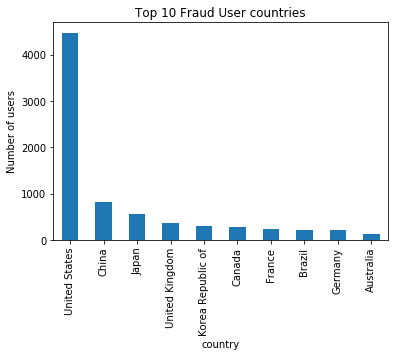

In [80]:
# Find top 10 fraud countries in Descending order of fraud activity we found United States as first in that list 

%matplotlib inline

fraud_data_class_1=fraud_data[fraud_data['class']==1]
fraud_data_class_1.groupby('country')['country'].count().sort_values(ascending=False).head(10)
fraud_data_class_1.groupby('country')['country'].count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Number of users')
plt.title('Top 10 Fraud User countries')

#### Data Exploration for inferring which gender group does more fraud from the data:

In [81]:
# Value counts of Male/Female in fraudelent transactions
#Mostly the fraudulent cases are recorded by males over females
fraud_data_class_1['sex'].value_counts(normalize=True)

M    0.594141
F    0.405859
Name: sex, dtype: float64

#### Data Pre-processing step for type conversion of date-time objects:

In [82]:
# Convert data type of date time columns
fraud_data.signup_time = fraud_data.signup_time.apply(pd.to_datetime)
fraud_data.purchase_time = fraud_data.purchase_time.apply(pd.to_datetime)

#### Data Exploration Step for Counts of Fradulent transactions happening at what hour is highest:

Text(0, 0.5, 'Count')

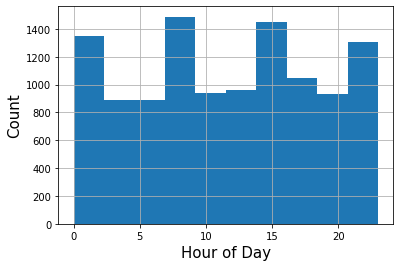

In [83]:
# Count the number of fraudulent transactions per hour of the day
fraud_data[fraud_data['class']==1].signup_time.apply(lambda x: x.hour).hist()
plt.xlabel("Hour of Day", fontsize=15)
plt.ylabel("Count", fontsize=15)

#### Data Exploration  for finding a new feature : Diff between the sign-up time till purchase

This seems to carry more meaning then just using individual time stamps. So we will engineer this extra feature in our data apart from the individual sign up and purchase times.  

In [84]:
# Calculate the time taken to purchase after signup
fraud_data["signup_to_purchase_seconds"] = (fraud_data.purchase_time - fraud_data.signup_time).apply(lambda x: x.seconds)

### Feature Engineering: 2. New Feature "Sign_up_to_purchase_time": 

#### This seems to be a better identifier in terms of using just the Sign up and Purchase Time so we will be using that instead of them. 

In [85]:
# Plot of count of time taken to purchase after signup

def plot_count_of_time(class_value,fraud_data):
    plt.figure(figsize=(16,8))
    fraud_data_class=fraud_data[fraud_data['class']==class_value]
    fraud_data_class['signup_to_purchase_h']=fraud_data_class['signup_to_purchase_seconds']/3600
    
    print(fraud_data_class['signup_to_purchase_h'].unique())
    fraud_data_class=fraud_data_class.round({'signup_to_purchase_h': 0})
    ax = sns.barplot(fraud_data_class['signup_to_purchase_h'].unique(),fraud_data_class['signup_to_purchase_h'].value_counts())
    for patch in ax.patches:
        ax.annotate('{:.0f}'.format(patch.get_height()), (patch.get_x()+0.3, patch.get_height()+100),fontsize=12)
    ax.set_title("Unique Counts of signup_to_purchase_hours with class {0}".format(class_value),fontsize=20)

#### Data Exploration of this new feature time taken to purchase after signup with non fraudulent data

[ 9.68333333 16.4        11.48333333 ... 14.28333333 20.78333333
 17.71666667]


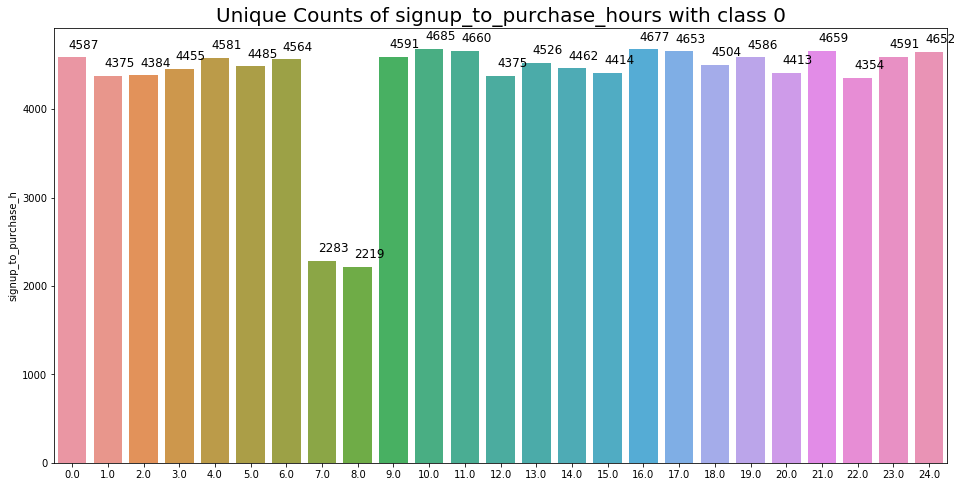

In [86]:
# Plot of count of time taken to purchase after signup with non fraudulent data
plot_count_of_time(0, fraud_data)

#### Data Exlploration for counts of time taken to purchase after signup with fraudulent data

[ 0.          4.28333333 19.66666667 ... 19.83333333  5.73333333
 23.46666667]


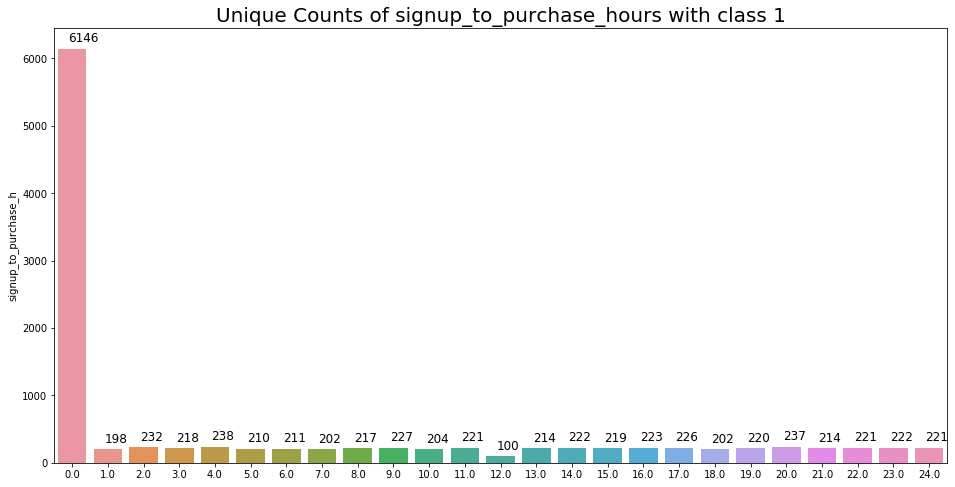

In [87]:
# Plot of count of time taken to purchase after signup with fraudulent data



plot_count_of_time(1, fraud_data)

### IMPORTANT POINT: We find very importantt fact here that most fraudulaent activities happen when the time diferrence is "very short" .

#### Hence we include this as a new Feature in our dataset

Text(0, 0.5, 'Sign-up to Purchase Time in Sec')

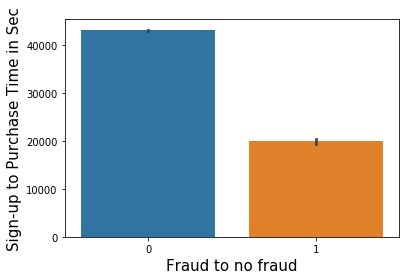

In [88]:
# Plot of Sign-up to Purchase Time in Sec
sns.barplot(x="class", y="signup_to_purchase_seconds", data=fraud_data)
plt.xlabel("Fraud to no fraud", fontsize=15)
plt.ylabel("Sign-up to Purchase Time in Sec", fontsize=15)

#### EDA for Purchase value vs type of class of transactions 

Text(0.42499999999999716, 0.5, 'Purchase Value')

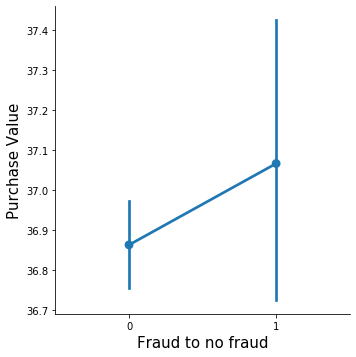

In [89]:
# Plot of purchase value for fraudulent and non fraudulent transactions
sns.factorplot(x="class", y="purchase_value", data=fraud_data)
plt.xlabel("Fraud to no fraud", fontsize=15)
plt.ylabel("Purchase Value", fontsize=15)

In [90]:
# Checking datatypes of the computed fraud data
fraud_data.dtypes

user_id                                int64
signup_time                   datetime64[ns]
purchase_time                 datetime64[ns]
purchase_value                         int64
device_id                             object
source                                object
browser                               object
sex                                   object
age                                    int64
ip_address                           float64
class                                  int64
country                               object
signup_to_purchase_seconds             int64
dtype: object

#### Data Pre-processing step for Converting the Categorical data to Numerical attributes:

We can also use Label Encoder from the pre-processing suite

In [91]:
# Converting the categorical data into numerical data
source_dict = {'SEO':0, 'Ads':1, 'Direct':2}
if is_string_dtype(fraud_data.source):
    fraud_data.source = fraud_data.source.replace(source_dict)
browser_dict = {'Chrome':0, 'Opera':1, 'Safari':2, 'IE':3, 'FireFox':4}
if is_string_dtype(fraud_data.browser):
    fraud_data.browser =fraud_data.browser.replace(browser_dict)
if is_string_dtype(fraud_data.sex):
    fraud_data['sex']=[1 if i == 'M' else 0 for i in fraud_data['sex']]

In [92]:
# datatypes of the data after converting categorical to numeric data
fraud_data.dtypes

user_id                                int64
signup_time                   datetime64[ns]
purchase_time                 datetime64[ns]
purchase_value                         int64
device_id                             object
source                                 int64
browser                                int64
sex                                    int64
age                                    int64
ip_address                           float64
class                                  int64
country                               object
signup_to_purchase_seconds             int64
dtype: object

#### Data Pre-processing step for Converting the Country names to Numerical attributes:


In [93]:
# Assign numerical values to the countries in the data
if is_string_dtype(fraud_data.country):
    labels = fraud_data['country'].astype('category').cat.categories.tolist()
    replace_map = {'country' : {country: label for country,label in zip(labels,list(range(1,len(labels)+1)))}}
    fraud_data.replace(replace_map,inplace=True)
    fraud_data['country'].fillna(0,inplace=True)


In [94]:
# datatypes of the data after converting countries to numeric data

fraud_data.dtypes

user_id                                int64
signup_time                   datetime64[ns]
purchase_time                 datetime64[ns]
purchase_value                         int64
device_id                             object
source                                 int64
browser                                int64
sex                                    int64
age                                    int64
ip_address                           float64
class                                  int64
country                              float64
signup_to_purchase_seconds             int64
dtype: object

### Feature Engineering 3: Another Important Feature that seems is the number of "Occurence of the Device-id" in the data so adding that as the new feature based on the relevance as shwn below:

As just device-id would not be a best attribute of relevance so making it even more meanigful by using counts of occurrence of a particualr devide id would be a better attribute of relevance. So adding that as a new feature in our data. 


In [95]:
# Calculate occurence of device ids in the data

fraud_data['occurence'] = 0
device_id_occurence = fraud_data['device_id'].value_counts()
fraud_data['occurence'] = fraud_data.apply(lambda row: device_id_occurence[row['device_id']], axis=1)
fraud_data['occurence'].value_counts()

1     106386
2       6832
9        990
8        840
10       810
11       748
7        630
12       612
13       520
6        444
14       364
5        305
3        144
15       105
4        104
16        96
17        51
19        19
Name: occurence, dtype: int64

#### Data Preprocessing- Dropping off ir-relevant columns from the data and keeping integrity of better features:

In [96]:
# Dropping irrelevant columns before our computation- purchase time, signup time, device id, ip address column

fraud_data=fraud_data.drop('purchase_time',axis=1)
fraud_data=fraud_data.drop('signup_time',axis=1)
fraud_data=fraud_data.drop('device_id',axis=1)
fraud_data=fraud_data.drop('ip_address',axis=1)

## STEP3: Preparing the data for Train Test Split: 

In [97]:
# drop class from the dataframe
fraud_data_no_class=fraud_data
fraud_data_no_class=fraud_data_no_class.drop('class',axis=1)

In [98]:
# data after dropping labelled class column
fraud_data_no_class

,user_id,purchase_value,source,browser,sex,age,country,signup_to_purchase_seconds,occurence
0,285108,31,2,0,1,49,167.0,34860,2
1,131009,31,0,3,0,21,166.0,59040,1
2,328855,16,2,3,1,26,167.0,41340,1
3,229053,29,0,0,1,34,87.0,75180,1
4,108439,26,1,4,1,33,24.0,62100,1
5,178528,35,0,0,0,30,167.0,86280,1
6,323775,28,0,2,1,47,0.0,33900,1
7,69189,21,0,4,0,47,63.0,56640,1
8,70424,43,2,3,1,40,148.0,83640,1
9,328496,40,1,2,1,33,59.0,780,1


In [99]:
# splitting data into test and train dataset

X_train, X_test, y_train, y_test = train_test_split(
    fraud_data_no_class, fraud_data['class'], test_size=0.3, random_state=42)

In [100]:
# Count of each class type in test data
y_test.value_counts()

0    32589
1     3411
Name: class, dtype: int64

In [101]:
# Count of each class type in training data
y_train.value_counts()

0    76146
1     7854
Name: class, dtype: int64

In [102]:
# percentage of data with fraud in training data
fraud_data_distribution_train = y_train.value_counts()
ratio_fraud_train = len(y_train[y_train==1])/len(y_train)
print("Percentage of data with fraud in training data= {} ".format(ratio_fraud_train*100))

Percentage of data with fraud in training data= 9.35 


In [103]:
# percentage of data with fraud in test data
fraud_data_distribution_test= y_test.value_counts()
ratio_fraud_test= len(y_test[y_test==1])/len(y_test)

# This indicates with the Test Data
print("Percentage of data with fraud in Test data= {} ".format(ratio_fraud_test*100))

Percentage of data with fraud in Test data= 9.475 


In [104]:
# Count of each class type in test data
fraud_data_distribution_test

0    32589
1     3411
Name: class, dtype: int64

## STEP4.- Models Evaluation and Selection: 

In [105]:
# methods to calculate accuracy, roc, confustion matrix, f1, recall and precision for all the models computed

def plot_confusion_matrix(conf_matrix):
    plt.matshow(conf_matrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def evaluation_report(y_test,y_predict):
    try:
        roc_auc = roc_auc_score(y_test, y_predict)
    except:
        "Error calculating ROC"

    conf_matrix = confusion_matrix(y_test, y_predict)
    print("Confusion matrix : ")
    print(conf_matrix)
    print(classification_report(y_test, 
                            y_predict))
    print("Area under ROC curve: {:0.3f}".format(roc_auc))
    plot_confusion_matrix(conf_matrix)
    return roc_auc


### 1. Random Forest Classifier: 

WHy Random Forest?


The Random forest is a tree-based ensemble supervised algorithm which involves building several decision trees, then combining their output to improve generalization ability of the model. We chose this in our project. 

#### This is chosen because in this particular problem decision based classifier which chooses the gini value to split most important nodes and features as its an indicator of the purity of the node: 

In [106]:
def get_random_forest_classifier():
    classifier_RF = RandomForestClassifier(n_estimators=300,random_state=43,n_jobs=-1)

def random_forest_fraud_prediction():
    unique, counts = np.unique(y_train, return_counts=True)

    print("Counts of the unique values in the train dataset")
    print(np.asarray((unique, counts)).T)

    classifier_RF = RandomForestClassifier(random_state=34)

    classifier_RF.fit(X_train, y_train)
    rf_score=classifier_RF.score(X_test, y_test)
    print("Random forest score without smote = {}".format(rf_score))
    
    # predicted labels 0/1 for the test set
    predicted_wo_smote = classifier_RF.predict(X_test)

    # generating class probabilities
    probs = classifier_RF.predict_proba(X_test)
    
    # generate evaluation metrics
    evaluation_report(y_test,predicted_wo_smote)
    
    print("%s: %r" % ("roc_auc_score is: ", roc_auc_score(y_test, probs[:, 1])))
    return classifier_RF

### Imbalance Class Problem Handling: Using Oversampling the minority class(Fraud data) 

#### We can clearly see that our Training data is imbalance which means as the nature of the problem which indicates that the number of fraudulent cases(which is one class in our problem) will always be lesser than the non-fraudulent cases(which is the other class in our problem) so there occurs a imbalance in our classes and samples present in our dataset. 

##### This is very important to handle as imbalance in the classes will not result in showing us the better results and will most likely will generate output which will be more likely be drawn towards the majority class. Inorder to avoid that we are Using SMOTE(and oversampling) to take care of that 

#### SMOT is performed only on the training data 


In [107]:
#SMOT on training data
smote = SMOTE(random_state=42)
x_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)


In [113]:
# Run random forest with smote over sampling

def random_forest_with_smote(x_train_sm, y_train_sm):
#     smote = SMOTE(random_state=42)
#     SMote on training set
#     x_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

    unique, counts = np.unique(y_train_sm, return_counts=True)

    print (np.asarray((unique, counts)).T)

    classifier_RF_sm = RandomForestClassifier(n_estimators=300,random_state=43)

    classifier_RF_sm.fit(x_train_sm, y_train_sm)

    # predicted labels 0/1 for the test set
    predicted_sm = classifier_RF_sm.predict(X_test)

    # generate class probabilities
    probs = classifier_RF_sm.predict_proba(X_test)

    rf_score_sm=classifier_RF_sm.score(X_test, y_test)
    print("Random forest score with smote = {}".format(rf_score_sm))
    
    
    print("%s: %r" % ("Roc_auc_score of random forest is: ", roc_auc_score(y_test, probs[:, 1])))

    
    
    # generate evaluation metrics
    evaluation_report(y_test,predicted_sm)
    
    
    
    
    return classifier_RF_sm

## 1.2. Random Forest without SMOTE classifier:

#### Counts of unique values of samples in each class: Before SMOTE


#### Imbalance of class:--

Counts of the unique values in the train dataset

CLass 0 --->76146


Class1 -->  7854

Counts of the unique values in the train dataset
[[    0 76146]
 [    1  7854]]
Random forest score without smote = 0.9544166666666667
Confusion matrix : 
[[32507    82]
 [ 1559  1852]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     32589
           1       0.96      0.54      0.69      3411

    accuracy                           0.95     36000
   macro avg       0.96      0.77      0.83     36000
weighted avg       0.95      0.95      0.95     36000

Area under ROC curve: 0.770


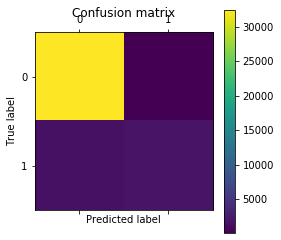

roc_auc_score is: : 0.811529321337372


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=34, verbose=0,
                       warm_start=False)

In [109]:
# Run random forest without SMOTE
random_forest_fraud_prediction()

### 1.3 Random Forest with SMOTE:

##### We see that the class imbalance is taken care of with each class 0 has 76146 and 1 has 76146 values and if we compare the F1-Score of both which is same and Precision is little lesser as expected with SMOTE and no compromise on Recall which is a good News and hence we chose this over the simple random forest. 
- F1 Score is pretty high among all. Hence we chose this as the best performing model.
- Accuracy is 95%
- Area under ROC(its 81.15% for this run). NOTE- Classification report tells the avergaed out roc_auc score. 


#### Counts of unique values of samples in each class: After SMOTE


#### Imbalance of class is handled:--

Counts of the unique values in the train dataset after smote

CLass 0 --->76146

Class1 -->  76146

[[    0 76146]
 [    1 76146]]
Random forest score with smote = 0.9538333333333333
Roc_auc_score of random forest is: : 0.8292829408393921
Confusion matrix : 
[[32493    96]
 [ 1566  1845]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     32589
           1       0.95      0.54      0.69      3411

    accuracy                           0.95     36000
   macro avg       0.95      0.77      0.83     36000
weighted avg       0.95      0.95      0.95     36000

Area under ROC curve: 0.769


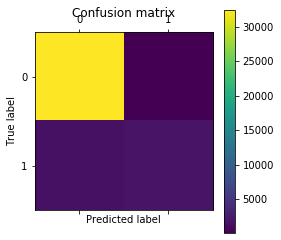

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=43, verbose=0,
                       warm_start=False)

In [114]:
# Run random forest with SMOTE
random_forest_with_smote(x_train_sm, y_train_sm)

### 1.4. Feature Importance - Random Forest

In [115]:
# Plot feature importance

def plot_importance(clf, feature, max_features):
    feature_importance = clf.feature_importances_
    # making importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    pos = pos[-max_features:]
    feature_importance = (feature_importance[sorted_idx])[-max_features:]
    feature = np.array(feature)
    feature_names = (feature[sorted_idx])[-max_features:]
    
    # Plot best features
    plt.barh(pos, feature_importance, align='center')
    plt.yticks(pos, feature_names)
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')

[[    0 76146]
 [    1 76146]]
Random forest score with smote = 0.9538333333333333
Roc_auc_score of random forest is: : 0.8292829408393921
Confusion matrix : 
[[32493    96]
 [ 1566  1845]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     32589
           1       0.95      0.54      0.69      3411

    accuracy                           0.95     36000
   macro avg       0.95      0.77      0.83     36000
weighted avg       0.95      0.95      0.95     36000

Area under ROC curve: 0.769


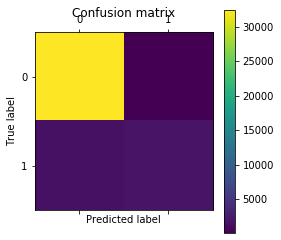

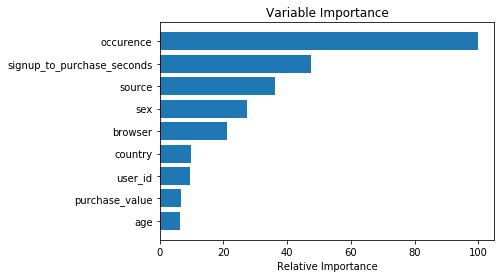

In [121]:
# Plot feature importance for random forest model

feature = X_train.columns.tolist()[:]
plot_importance(random_forest_with_smote(x_train_sm, y_train_sm), feature, max_features=10)

### CONCLUSION from Random Forest: 

#### Very good F1 score(best among all methods) , Also accuracy and Roc_AUC are very good. 

### OBSERVATION FROM IMP FEATURES: 

Also Among feature importance we see that Sign-up-to-purchase has more value than others .second is Occurence of the device id in the data. Its very interesting to find these information hidden in the data which happened to be among top 2 contributing factors for any fraudulent activity detection. 

## 2. K-Nearest Neighbours Classifier: 

WHY KNN? 


KNN classifier is also a non parametric and instance-based supervised learning algorithm. Non-parametric means it makes no explicit assumptions about the function or on the underlying data distribution. And instance based supervised means it memorizes each instances and thus the K-nearest neighbor algorithm essentially generates a majority vote between the K most similar instances to a given observation. Which in turn can be a helpful model approah in our case.


Second Best Model for our case. 

- F1-Score 64% for class 1  
- Accuracy 94%
- AUC_ROC 76.2%

Good f1. We will explore other models.

In [136]:
# Scores list will contain the scores for each k
scores={}
scores_list=[]
for k in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_predicted=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,y_predicted)
    scores_list.append(scores[k])

#### Using above approach we can perform a hyper parameter search to find the best k 

Confusion matrix : 
[[32121   468]
 [ 1573  1838]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     32589
           1       0.80      0.54      0.64      3411

    accuracy                           0.94     36000
   macro avg       0.88      0.76      0.81     36000
weighted avg       0.94      0.94      0.94     36000

Area under ROC curve: 0.762


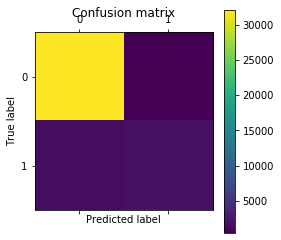

KNN Model score = 0.9433055555555555


In [137]:
# Evaluation metrics for K Nearest Neighbours Classifier
evaluation_report(y_test,y_predicted)
knn_score=knn.score(X_test, y_test)
print("KNN Model score = {}".format(knn_score))
    

Text(0, 0.5, 'Accuracy')

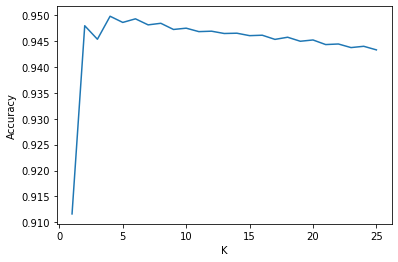

In [138]:
# Plotting K against accuracy for K Nearest Neighbours Classifier 
plt.plot(range(1,26),scores_list)
plt.xlabel("K")
plt.ylabel("Accuracy")

#### Hyper-parameter Search Results for each k values: 

In [128]:
# List of scores for each K
for k in range(0,25):
    print("K = {} Score = {}".format(k,scores_list[k]))

K = 0 Score = 0.797
K = 1 Score = 0.8651666666666666
K = 2 Score = 0.7900833333333334
K = 3 Score = 0.8410555555555556
K = 4 Score = 0.7903888888888889
K = 5 Score = 0.8317777777777777
K = 6 Score = 0.7905555555555556
K = 7 Score = 0.8246944444444444
K = 8 Score = 0.7907222222222222
K = 9 Score = 0.8217222222222222
K = 10 Score = 0.7901111111111111
K = 11 Score = 0.8192222222222222
K = 12 Score = 0.7921944444444444
K = 13 Score = 0.8190277777777778
K = 14 Score = 0.7928333333333333
K = 15 Score = 0.8175555555555556
K = 16 Score = 0.7953611111111111
K = 17 Score = 0.8177777777777778
K = 18 Score = 0.7961111111111111
K = 19 Score = 0.8180833333333334
K = 20 Score = 0.7993888888888889
K = 21 Score = 0.8187777777777778
K = 22 Score = 0.8030833333333334
K = 23 Score = 0.8210833333333334
K = 24 Score = 0.8063888888888889


## 3.Logistic Regression:

Chose this for experimentation as its a very good Supervised Algorithm for binary class classification algorithm.

- Second best F1=64% on class 1 same as KNN .
- Accuracy at 94%. 
- AUC - 78.2% better than KNN


In [129]:
# instantiate the logistic regression model
logreg = LogisticRegression(random_state=43, solver='lbfgs')
logreg.fit(x_train_sm, y_train_sm)

# predict on test
lr_y_pred=logreg.predict(X_test)

Logistic Regression score = 0.941
Confusion matrix : 
[[31876   713]
 [ 1411  2000]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     32589
           1       0.74      0.59      0.65      3411

    accuracy                           0.94     36000
   macro avg       0.85      0.78      0.81     36000
weighted avg       0.94      0.94      0.94     36000

Area under ROC curve: 0.782


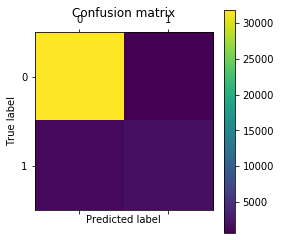

0.7822298846163592

In [130]:
# Evaluation report for the Logistic Regression Model
log_reg_score=logreg.score(X_test,y_test)
print("Logistic Regression score = {}".format(log_reg_score))
evaluation_report(y_test,lr_y_pred)


## 4. Isolation Forest

Why Isolation Forest?

This is a supervised algorithm and it relies on the fact that anomalies are data points that are few and unique. As a result of these properties, anomalies are susceptible to a mechanism called isolation. It also builds ensemble of differnt i-trees which is later used for classification of these anomalies present in the data.

- This is known method for Anomaly Detection problems. Finds out outliers in the data and Flags it. For our case we found this as:
- 4th best model. 
- F1 score on fraud detection is 54%
- Accuracy is 91%
- AUC roC- 74.6%

Better hyper-parameters tuning can be achieved with Grid Search. 

#### converting the binary values to 1 and -1 since the isolation forest performs operations on 1 and -1

In [131]:
# converting the binary values to 1 and -1 since the isolation forest performs operations on 1 and -1
Y_dev = y_train.apply(lambda x: 1 if x == 0 else -1)
Y_eval = y_test.apply(lambda x: 1 if x == 0 else -1)

## STEP5: Hyper-parmeter tuning with Grid-Search on Isolation Forest:

In [132]:
# Y dev and y eval from transformed from ytrain and y test. 
# x dev and x eval will the same as x train and x test
X_dev=X_train
X_eval=X_test
# percentage of fraud samples in the training dataset is specified to the model
IF = IsolationForest(max_samples="auto", contamination=0.095,behaviour="new",random_state=43)

# Define the parameter grid to search over
param_grid = {"n_estimators": [100, 200, 300, 500, 600]}

clf = GridSearchCV(IF, 
                   param_grid=param_grid, 
                   cv=5,
                   scoring="f1",
                   verbose=10)

# Perform grid search
_ = clf.fit(X_dev, Y_dev)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=100, score=0.948, total=   5.3s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.951, total=   4.3s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.6s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.949, total=   4.2s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.8s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.949, total=   4.9s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   18.7s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.951, total=   4.5s
[CV] n_estimators=200 ................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.2s remaining:    0.0s


[CV] .................... n_estimators=200, score=0.949, total=   9.9s
[CV] n_estimators=200 ................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   33.1s remaining:    0.0s


[CV] .................... n_estimators=200, score=0.953, total=   6.7s
[CV] n_estimators=200 ................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   39.8s remaining:    0.0s


[CV] .................... n_estimators=200, score=0.951, total=   6.8s
[CV] n_estimators=200 ................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   46.6s remaining:    0.0s


[CV] .................... n_estimators=200, score=0.952, total=   6.5s
[CV] n_estimators=200 ................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   53.0s remaining:    0.0s


[CV] .................... n_estimators=200, score=0.954, total=   6.6s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.950, total=   9.7s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.952, total=   9.7s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.952, total=   9.4s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.952, total=  11.4s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.954, total=   9.2s
[CV] n_estimators=500 ................................................
[CV] .................... n_estimators=500, score=0.949, total=  16.8s
[CV] n_estimators=500 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  4.8min finished


#### Find out the best estimator:

In [133]:
clf.best_estimator_

IsolationForest(behaviour='new', bootstrap=False, contamination=0.095,
                max_features=1.0, max_samples='auto', n_estimators=300,
                n_jobs=None, random_state=43, verbose=0, warm_start=False)

#### Evaluating the model performance:

Confusion matrix : 
[[ 1844  1567]
 [ 1572 31017]]
              precision    recall  f1-score   support

          -1       0.54      0.54      0.54      3411
           1       0.95      0.95      0.95     32589

    accuracy                           0.91     36000
   macro avg       0.75      0.75      0.75     36000
weighted avg       0.91      0.91      0.91     36000

Area under ROC curve: 0.746


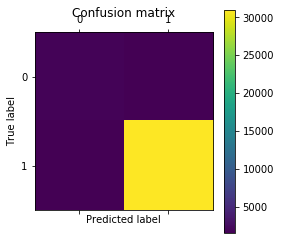

Area under ROC curve: 0.746


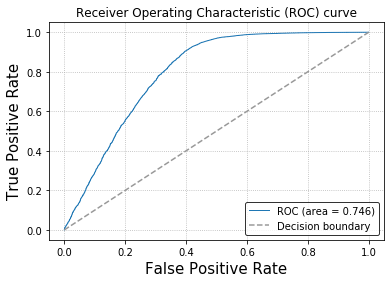

In [134]:
IF_best = clf.best_estimator_
Y_predicted = IF_best.predict(X_eval)

# Evaluation Metrics for Isolation Forest
roc_auc = evaluation_report(Y_eval, Y_predicted)
# Class -1 --> Fraud ; CLass 1--> Non-fraud

print("Area under ROC curve: {:0.3f}".format(roc_auc))

# Compute ROC curve and area under the curve
IF_probs = IF_best.decision_function(X_eval)
fpr, tpr, thresholds = roc_curve(Y_eval, IF_probs)

plt.plot(fpr, tpr, lw=1, label='ROC (area = %0.3f)'%(roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Decision boundary')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC) curve', fontsize=12)
plt.legend(loc="lower right", frameon = True).get_frame().set_edgecolor('black')
plt.grid(True, linestyle = 'dotted')
plt.show()

## STEP6: Overall Results and Best Model Selection: 

### 1. Random Forest Classfier with SMOTE

#### Best Model

##### - Accuracy of 95%(Better hyperparameters can be searched by performing the grid search operation)  

##### - Best F1-Score on fraud among all methods of 69%.

##### - Best auc_roc score as well of 82.9%.  

##### We will choose this as our best model.  Fine tuning using grid search will even give more better results. 


### 2. Logistic Regression: 

#### 2nd best model

##### - Accuracy of 94%
##### - F1-score: 65%
##### - AUC_roc: 78.2%

### 3. K-NN- 

#### - 3rd best model 

##### - with 94% Accuracy

##### - 64% F1-Score on fraud and
 
##### - 76.2% auc_roc.  

##### Best Hyper-paramenters(k) is found and displayed in the code along with a good auc-roc score.  

### 3. Isolation Forests-

##### - 4th Best. 

##### - More better hyper-parameter serach can be better fine tuned with the Grid search approach .

##### - For the performed results we have achieved -Accuracy of 91% 

##### - with 54% F1-score on fraud

##### - and good auc-roc score.

### STEP5: Hyper-parameter tuning using Grid Search for Random Forest:

In [135]:
rf_params = {
    'max_depth': [4, 8, None],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True],
    'n_estimators': [50, 100, 200, 400, 500],
    'random_state': [67],
    'oob_score': [True],
    'n_jobs': [-1]
    }
def optimize_hyperparameters(model, params, X_train, y_train):
    
    gs = GridSearchCV(model(), params, cv=10, n_jobs=-1, verbose=True, scoring='roc_auc')
    gs.fit(X_train, y_train)
    print (gs.best_params_)

# print best parameters - very time consuming operation for optimizing hyper parameters
# optimize_hyperparameters(RandomForestClassifier, rf_params, X_train, y_train)

## STEP7- Conclusion and Next Steps:

### Even though with some trade-offs is always a consideration. But for our case I will recommend to choose the Random Forest as the suggested model for this kind of data. Fine tuning can be achieved by better tuning by using a Grid search to optimize the ROC-AUC and F1-score. 

### F1-Score and AUC is a reliable criteria apart from accuracy in this case of problem. 


## STEP8- Recommendations to Owners of E-commerce websites-

### - After sign-up engage users in better offers 
### - Have a better security model and record each user activities and perform  tracking of interest history and other relevant things
### - Keep track of sign-up to purchase time and other important relevant attributes as indicated ablove like device counts , usrid , country and source etc. 

### - Even better and more fine tuning can still be done to make the model accuracy and fraudulent activity detection even better.

###                                       ****************-------------------------xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx--------------------------------------------------******************